# Codigo Base ONE PIZZA 2022

In [10]:
#!/usr/bin/python3
import sys
import random
import pandas as pd


#Variables globales
nClientes=0
leGusta=[]
noLeGusta=[]
ingredientesDisponibles=set()


#Imprimir solucion

def imprimirSolucion(s):
    cad=str(len(s))

    for x in s:
        cad=cad + " " + x

    print(cad)



# Indicamos fichero a analizar

In [11]:

#Indico que voy a 
fichero="e_elaborate.in"
sys.stdin = open(fichero, "r")


# Leyendo datos

In [12]:

#Leo el numero de potenciales clientes 
nClientes=int(sys.stdin.readline())


#Por cada cliente, leemos sus preferencias que gustan y no gustan
for i in range(nClientes):
    leGusta.append(sys.stdin.readline().strip().split(" ")[1:])
    noLeGusta.append(sys.stdin.readline().strip().split(" ")[1:])

    #Incluimos ingredientes que gustan a la lista total de ingredientes
    for ingr in leGusta[i]:
        ingredientesDisponibles.add(ingr)
    #Incluimos ingredientes que no gustan a la lista total de ingredientes
    for ingr in noLeGusta[i]:
        ingredientesDisponibles.add(ingr)
    

# Solucion aleatoria

In [13]:

    #Solucion aleatoria
    sol= random.sample(ingredientesDisponibles,random.randint(1,len(ingredientesDisponibles)))
    
    #imprimirSolucion(sol)

# Leyendo dataFrame con Pandas

In [14]:


    #Dataframe de lo que gusta y no gusta:
    dfGusta = pd.DataFrame(columns = ['Ingredientes', 'Conteo'])
    #Dataframe de lo que no gusta:
    dfNoGusta = pd.DataFrame(columns = ['Ingredientes', 'Conteo'])

    for ingr in ingredientesDisponibles:
        #Para cada elemento, contamos cuantos hay
        elementos=sum(x.count(ingr) for x in leGusta)

        fila = pd.Series([ingr,elementos], index = dfGusta.columns)
        dfGusta = dfGusta.append(fila, ignore_index=True)
       

    for ingr in ingredientesDisponibles:
        #Para cada elemento, contamos cuantos hay
        elementos=sum(x.count(ingr) for x in noLeGusta)

        fila = pd.Series([ingr,elementos], index = dfNoGusta.columns)
        dfNoGusta = dfNoGusta.append(fila, ignore_index=True)

       




# Histograma "Gustan"

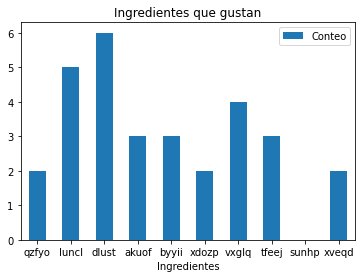

In [6]:
fig= dfGusta.plot.bar(x='Ingredientes', y='Conteo', rot=0.,title='Ingredientes que gustan')
fig.get_figure().savefig("analisis/histograma/"+fichero+"-Gusta.pdf")


# Histrogram "No gustan"

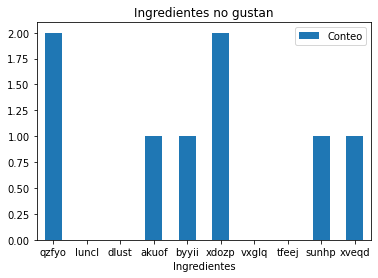

In [7]:
fig=dfNoGusta.plot.bar(x='Ingredientes', y='Conteo', rot=0,title='Ingredientes no gustan')
fig.get_figure().savefig("analisis/histograma/"+fichero+"-NoGusta.pdf")


# Ordenamos "Gusta" y mostramos primeros

In [8]:
dfGusta=dfGusta.sort_values('Conteo', ascending=False)
pd.set_option("max_rows", None)
dfGusta.head()

,Ingredientes,Conteo
2,dlust,6
1,luncl,5
6,vxglq,4
3,akuof,3
4,byyii,3


# Ordenamos "No gusta"

In [9]:
dfNoGusta=dfNoGusta.sort_values('Conteo', ascending=False)
pd.set_option("max_rows", None)
dfNoGusta.head()


,Ingredientes,Conteo
0,qzfyo,2
5,xdozp,2
3,akuof,1
4,byyii,1
8,sunhp,1
